# MNIST project

Using dense layer neural network to distinguish handwritten digits from 0 to 9

In [2]:
import keras
from keras.datasets import mnist

Data loading

In [3]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Model creation

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10,activation = 'softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
import matplotlib.pyplot as plt

for i in range(25):
    plt.imshow(train_image[i],comp = plt.cm.binary)
    plt.subplot(5,5,i+1)
plt.show    

In [7]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Training model

In [8]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2515 - accuracy: 0.9268
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1030 - accuracy: 0.9700
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0671 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0493 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0369 - accuracy: 0.9887


In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [24]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,len(acc)+1)

Visualizing results of the training

<function matplotlib.pyplot.show>

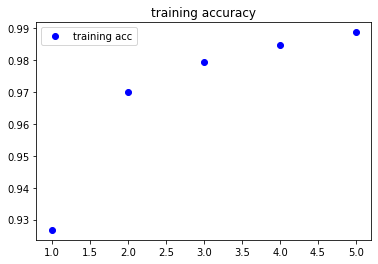

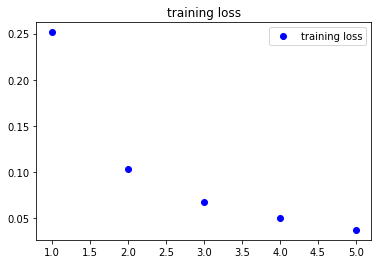

In [26]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.title('training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.title('training loss')
plt.legend()

plt.show

In [27]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0603 - accuracy: 0.9823


In [28]:
print('test_acc:', test_acc)

test_acc: 0.9822999835014343
